#Project Name : Volatility clustering to help investor in diversification of portfolio

Introduction: Prediksi pasar saham adalah tindakan mencoba untuk menentukan nilai masa depan dari saham perusahaan atau instrumen keuangan lain yang diperdagangkan di bursa keuangan. Prediksi sukses dari harga saham di masa depan akan memaksimalkan keuntungan investor. Dalam proyek ini, kami menggunakan model machine learning untuk menentukan kelas / cluster saham yang diminati investor. Hal ini akan membantu investor untuk mendiversifikasi portofolionya.


In [ ]:
!pip install scikit-learn==0.20.4

In [ ]:
from google.colab import drive
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###1.Grab and load the data

In [ ]:
stock = pd.read_csv('/content/drive/MyDrive/Tugas Cluster/dataset_corporation_stocks.csv')
stock

,date,open,high,low,close,volume,Name
0,2/8/2013,15.07,15.12,14.63,14.75,8407500,AAL
1,2/11/2013,14.89,15.01,14.26,14.46,8882000,AAL
2,2/12/2013,14.45,14.51,14.10,14.27,8126000,AAL
3,2/13/2013,14.30,14.94,14.25,14.66,10259500,AAL
4,2/14/2013,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2/1/2018,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2/2/2018,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2/5/2018,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2/6/2018,72.74,74.56,72.13,73.27,4924323,ZTS


Data yang disajikan berupa data saham 5 tahun untuk 500 saham S&P. Dataset diambil dari set data publik ).

Semua saham memiliki kolom berikut:

1. Tanggal - dalam format: hh-bb-tttt
2. Open - harga saham saat pasar buka
3. Tertinggi - Harga tertinggi yang dicapai pada hari itu
4. Penutupan Rendah - Harga terendah yang dicapai pada hari itu
5. Volume - Jumlah saham yang diperdagangkan
6. Nama - nama ticker saham

###2.EDA (Exploratory Data Analysis)

###Checking number of stock records and features for a specific stock 'ADRO'

In [ ]:
ticker_name = 'AAPL'
stock_a = stock[stock['Name'] == ticker_name]
stock_a.shape

(1259, 7)

###Check for null values to plan for pre-processing of data

In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


###Check the distribution of data to understand variance in features to plan for scaling

In [ ]:
stock_a.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


###Menambahkan fitur baru untuk memahami variasi harga saham dalam satu hari dan dari hari sebelumnya, fitur tambahan ini akan membantu dalam memprediksi harga saham penutupan hari dengan akurasi maksimal serta fitur ini membantu model untuk mengklasifikasikan volatilitas saham.

In [ ]:
stock_a['changeduringday'] = ((stock['high'] - stock['low'] )/ stock['low'])*100

stock_a['changefrompreviousday'] = (abs(stock_a['close'].shift() - stock_a['close'] )/ stock['close'])*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
stock_a

,date,open,high,low,close,volume,Name,changeduringday,changefrompreviousday
1259,2/8/2013,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,2.255250,NaN
1260,2/11/2013,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,2.470155,1.031484
1261,2/12/2013,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,3.129130,2.571107
1262,2/13/2013,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,2.249517,0.190660
1263,2/14/2013,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,1.642215,0.090015
...,...,...,...,...,...,...,...,...,...
2513,2/1/2018,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,1.115375,0.208607
2514,2/2/2018,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,4.184884,4.535826
2515,2/5/2018,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,5.051282,2.562464
2516,2/6/2018,154.8300,163.7200,154.0000,163.0300,68243838,AAPL,6.311688,4.011532


###Mari kita lihat representasi grafis dari distribusi satu saham

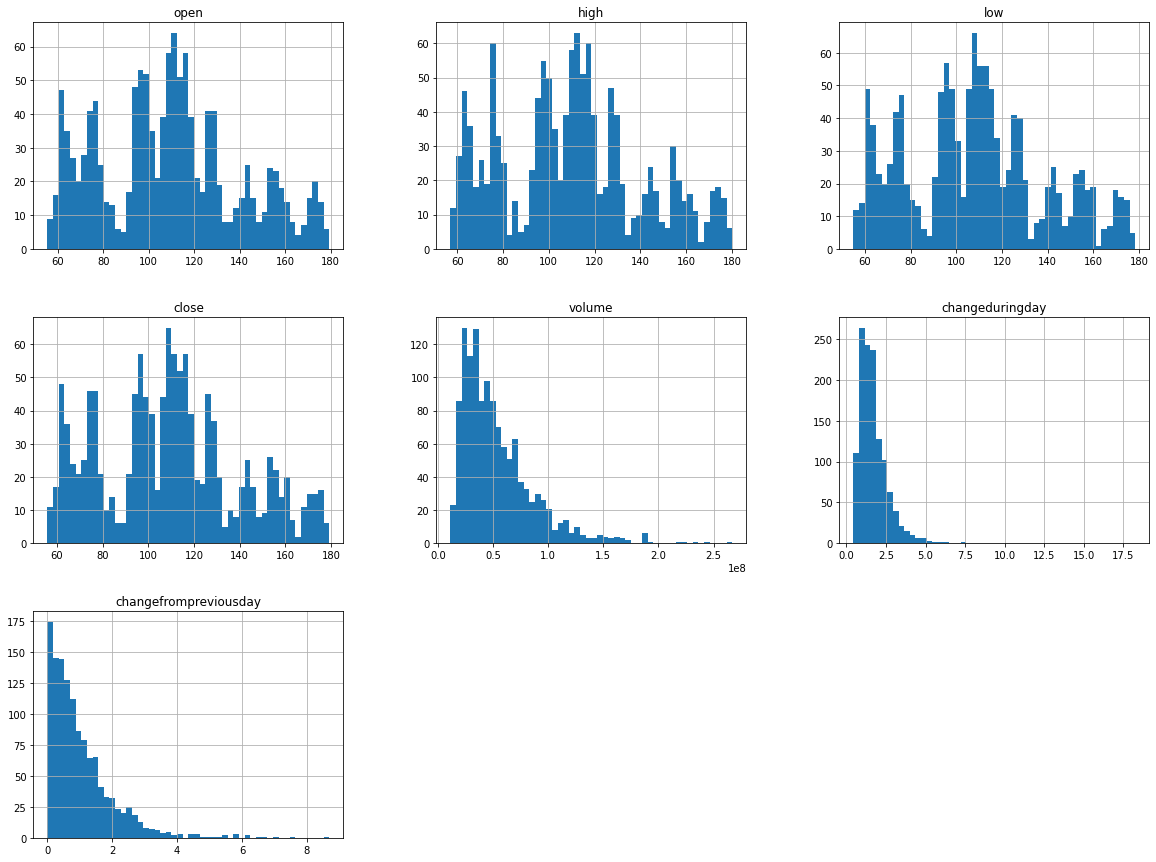

In [ ]:
stock_a.hist(bins=50, figsize=(20,15))
plt.show()

###Variations in day close price of the stock AAPL

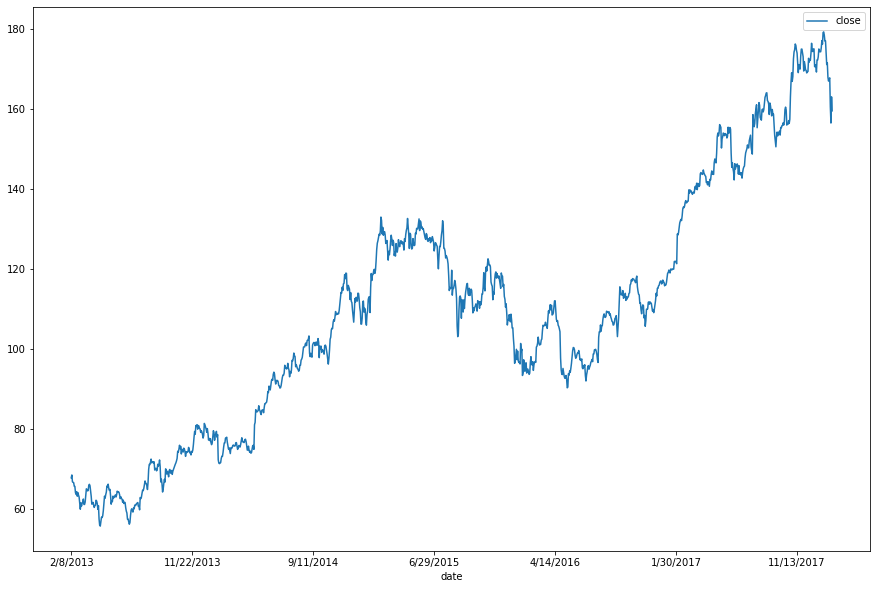

In [ ]:
stock_a.plot(kind="line", x="date", y="close", figsize=(15, 10))

###Building the correlation matirix to know the correlation bewtween close price(target) and the other features

In [ ]:
corr_matrix = stock_a.corr()

In [ ]:
corr_matrix["close"].sort_values(ascending=False)

close                    1.000000
low                      0.999614
high                     0.999584
open                     0.999118
changefrompreviousday   -0.099145
changeduringday         -0.176314
volume                  -0.620290
Name: close, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69e4621b10>,
      dtype=object)

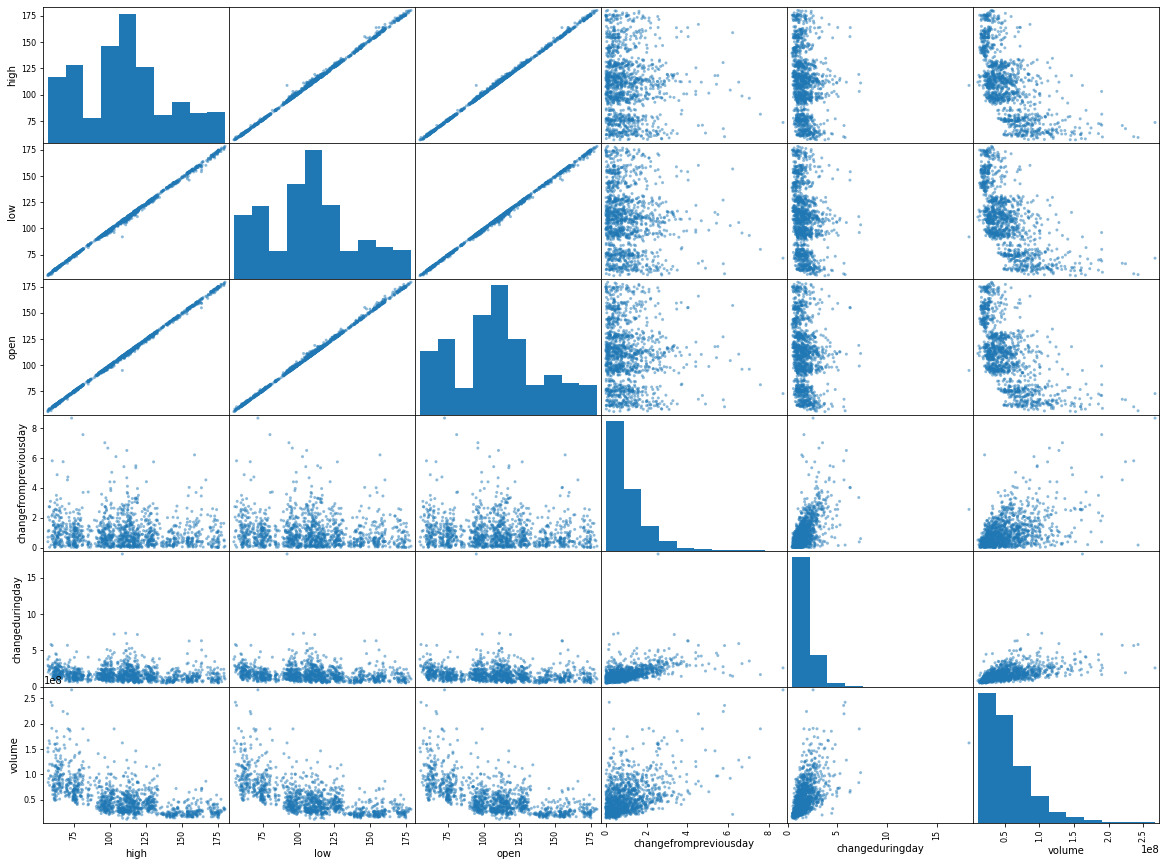

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["high", "low", "open", "changefrompreviousday", "changeduringday", "volume"]

scatter_matrix(stock_a[attributes], figsize=(20, 15))

###Heap map for the feature correlation

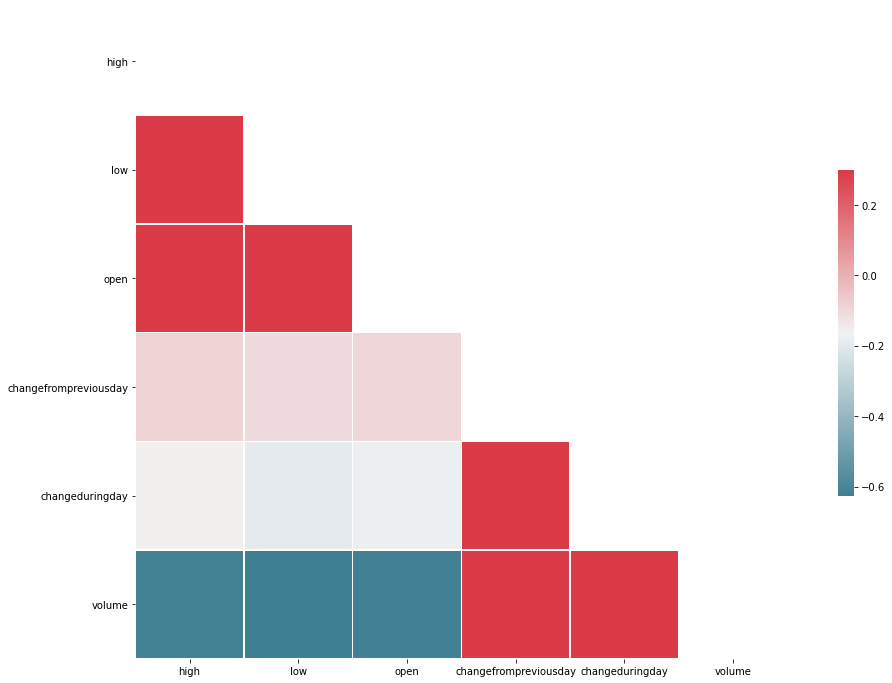

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
corr = stock_a[["high", "low", "open", "changefrompreviousday", "changeduringday", "volume"]].corr()

# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 12))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

#4. Statistics Significance test

In [ ]:
from sklearn.svm import SVR
svr_pipeline_std = Pipeline([
        ('imputer', Imputer(missing_values="NaN",strategy="median")), #Use the "median" to impute missing vlaues
        ('scaler',StandardScaler()),
        ('svr', SVR(kernel="linear"))
        
    ])

svr_pipeline_std.fit(X_stock_train, y_stock_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])

In [ ]:
#Statistics Significance test  

from sklearn.model_selection import cross_val_score
from scipy import stats

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# A sampling based bakeoff using K-fold cross-validation: 
# it randomly splits the training set into K distinct subsets (k=30)
# this bakeoff framework can be used for regression or classification
#Control system is a linear regression based pipeline

kFolds=30

lin_scores = cross_val_score(Lr_pipeline_std, X_stock_train, y_stock_train,
                             scoring="neg_mean_squared_error", cv=kFolds)
control = lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

scores = cross_val_score(svr_pipeline_std, X_stock_train, y_stock_train,
                         scoring="neg_mean_squared_error", cv=kFolds)
treatment = tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

#paired t-test; two-tailed p-value (aka two-sided)
(t_score, p_value) = stats.ttest_rel(control, treatment)
print("The p-value is %0.5f for a t-score of %0.5f." %(p_value, t_score))
#"The p-value is 0.00019 for a t-score of -4.28218." 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was 

Scores: [0.48933265 0.63960866 0.29269748 0.50564653 0.59538865 0.42332953
 0.4842434  0.38082912 0.44793622 0.42643303 0.54441415 0.58154951
 0.55341425 0.57358656 0.66199448 0.48044298 0.56677901 0.86165135
 0.36790246 0.41388803 0.67657559 0.41840509 0.53968326 0.44343029
 0.51375043 0.60603642 0.47109019 0.46414375 0.4948605  0.47652579]
Mean: 0.513185644864876
Standard deviation: 0.10883013188341605


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was 

Scores: [0.72701364 0.81617662 0.56173792 0.72082458 0.76418538 0.61738224
 0.84383079 0.63692736 0.76488483 0.55969705 0.53195726 1.03646812
 0.70225812 0.61787996 0.68666184 0.66921508 0.75883946 0.98713245
 0.5311345  0.72296081 0.96204729 0.7583536  0.60096434 1.03737048
 0.98023901 0.8449231  0.69625658 0.53032541 0.72920602 0.53851932]
Mean: 0.7311791054292116
Standard deviation: 0.15048388140349636
The p-value is 0.00000 for a t-score of -8.71501.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
if p_value > 0.05/2:  #Two sided
 print('There is no significant difference between the two machine learning pipelines (Accept H0)')
else:
    print('The two machine learning pipelines are different (reject H0) \n(t_score, p_value) = (%.2f, %.5f)'%(t_score, p_value) )
    if t_score < 0.0:
        print('Machine learning pipeline Linear regression is better than linear SVR pipeline')
    else:
        print('Machine learning pipeline linear SVR pipeline is better than Linear regression')

The two machine learning pipelines are different (reject H0) 
(t_score, p_value) = (-8.72, 0.00000)
Machine learning pipeline Linear regression is better than linear SVR pipeline


#6. Clustering Model of Stocks

####Model Pengelompokan Saham
Sebelumnya, kami menetapkan kelas secara manual ke data pelatihan dan menggunakan model klasifikasi untuk memprediksi kelas data pengujian. Sekarang kami menggunakan pembelajaran tanpa pengawasan (Metode Clustering) untuk membagi saham dalam cluster yang sama dan akan menggunakan model cluster untuk memprediksi cluster untuk saham investor.

Banyak algoritme menggunakan kesamaan atau pengukuran jarak antar contoh di ruang fitur dalam upaya untuk menemukan wilayah pengamatan yang padat. Karena itu, sering kali merupakan praktik yang baik untuk menskalakan data sebelum menggunakan algoritme pengelompokan.

Tidak ada algoritme pengelompokan terbaik, dan tidak ada cara mudah untuk menemukan algoritme terbaik untuk data Anda tanpa menggunakan eksperimen terkontrol.

###6.5 K-Means model using K-mean++ for deciding number of clusters

In [ ]:
from sklearn.cluster import KMeans
X_class = np.array(df.iloc[:, 2:8]) 	# end index is exclusive

k_mean = KMeans()

#number of clusters will be decided by K-mean++ , by default 
k_mean_model = k_mean.fit(X_class)

print("Number of clusters",k_mean_model.n_clusters)

Number of clusters 8


In [ ]:
df_cluster = df.drop(['CLASS'], axis=1)

#Selecting features from dataframe , there are 6 features 
X_cluster = np.array(df_cluster.iloc[:, 1:7])

y_pred = k_mean_model.predict(X_cluster)

pred_df = pd.DataFrame({'labels': y_pred, 'companies': df_cluster.iloc[:, 0]})

In [ ]:
#Cluster assignment for the stocks 
pred_df

,labels,companies
0,0,ZTS
1,6,ZION
2,7,ZBH
3,6,YUM
4,0,XYL
...,...,...
500,0,ABBV
501,4,AAPL
502,4,AAP
503,0,AAL
